In [1]:
%load_ext autoreload
%autoreload 2

# Compare the same dataset with different dt's

We want to see if the peak in circuits with a certain (small) senitivity value is due to the initial copy numbers. For this, we simulated two datasets with the same circuit topologies / binding energies as dataset `2024_11_27_145142`, but with two different starting copy numbers.

Dataset `2026_01_12__18_50_13` has a starting copynumber of 100, while dataset `2026_01_14__22_38_47` has a starting count of 200 (which is the same as dataset `2024_11_27_145142`, but we needed to resimulate this to make sure any changes to the underlying code for simulation are accounted for). 

In this notebook, we compare the two simulated datasets and find that their sensitivity distributions do not differ substantially and they have the same sensitivity peak.

In [2]:
import numpy as np
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from common import set_theme

PALETTE = 'viridis'
set_theme()

top_write_dir = os.path.join('data', '28_sensitivity_peak4')

# Load dataset

Datasets:
- Original: `2024_11_27_145142`
- Starting copies = 100, dt0 = 0.0001: `2026_01_12__18_50_13`
- Starting copies = 200, dt0 = 0.0001: `2026_01_14__22_38_47`
- Starting copies = 100, dt0 = 0.01: `2026_01_15__15_43_12`


In [ ]:
fn_og = '../data/raw/summarise_simulation/2024_11_27_145142/tabulated_mutation_info.csv'
fn1 = 'data/simulate_circuits/2026_01_12__18_50_13/analytics.json'
fn2 = 'data/simulate_circuits/2026_01_14__22_38_47/analytics.json'
fn3 = 'data/simulate_circuits/2026_01_15__15_43_12/analytics.json'
df_og = pd.read_csv(fn_og).drop(columns=['RMSE'])
df1 = pd.read_json(fn1).drop(columns=['RMSE'])
df2 = pd.read_json(fn2).drop(columns=['RMSE'])
df3 = pd.read_json(fn3).drop(columns=['RMSE'])
df1 = df1.explode(df1.columns.to_list()).reset_index(drop=True)
df2 = df2.explode(df2.columns.to_list()).reset_index(drop=True)
df3 = df3.explode(df3.columns.to_list()).reset_index(drop=True)

Add sample names

In [ ]:
names_species_input = df_og['sample_name'].unique()
n_species_input = len(names_species_input)
n_species_total = int(len(df1) / len(df_og) * n_species_input)

def add_sample_names(df, names_species_input, n_species_input, n_species_total):
    df['sample_name'] = (np.arange(n_species_total) * np.ones((int(len(df)/n_species_total), n_species_total))).flatten()
    df = df[df['sample_name'].isin(list(np.arange(n_species_total)[-n_species_input:]))].reset_index(drop=True)
    df['sample_name'] = df['sample_name'].map(lambda x: names_species_input[int(x - (n_species_total - n_species_input))])
    return df

df1 = add_sample_names(df1, names_species_input, n_species_input, n_species_total)
df2 = add_sample_names(df2, names_species_input, n_species_input, n_species_total)
df3 = add_sample_names(df3, names_species_input, n_species_input, n_species_total)
len(df_og), len(df1), len(df2), len(df3)


(2535000, 2535000, 2535000)

# Visualise

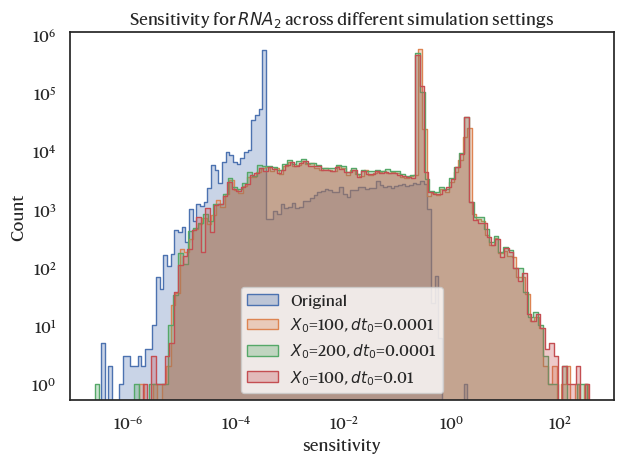

In [12]:
filt = df_og['sample_name'] == 'RNA_2'
sns.histplot(df_og[filt], x='sensitivity', bins=100,
             log_scale=(True, False), element='step', alpha=0.3)
sns.histplot(df1[filt], x='sensitivity', bins=100,
             log_scale=(True, False), element='step', alpha=0.3)
sns.histplot(df2[filt], x='sensitivity', bins=100,
             log_scale=(True, False), element='step', alpha=0.3)
sns.histplot(df3[filt], x='sensitivity', bins=100,
             log_scale=(True, False), element='step', alpha=0.3)
plt.legend(['Original', '$X_0$=100, $dt_0$=0.0001', '$X_0$=200, $dt_0$=0.0001',
            '$X_0$=100, $dt_0$=0.01'])
plt.yscale('log')
plt.title('Sensitivity for $RNA_2$ across different simulation settings')
plt.tight_layout()